In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error


In [95]:
# Load the CSV data
file_path = 'experiment_3_extrapolation_results.csv'
data = pd.read_csv(file_path)

In [96]:
# Display the loaded data
print("Loaded data:")
print(data)

Loaded data:
   Drop Percentage  Dropped Nodes  Avg Total Nodes Dropped  \
0             10.0              1                     1.60   
1             20.0              2                     3.05   
2             30.0              3                     4.38   
3             35.0              4                     5.62   
4             42.0              5                     6.76   
5             50.0              6                     7.76   
6             60.0              7                     8.71   
7             70.0              8                     9.51   
8             75.0              9                    10.27   
9             85.0             10                    10.90   

   Actual Drop Percentage  Average Success  Baseline  Difference  
0                9.411765            0.105     0.089       0.016  
1               17.941176            0.121     0.089       0.032  
2               25.764706            0.134     0.089       0.045  
3               33.058824           

In [97]:
# Extract the variables for regression
X = data['Actual Drop Percentage'].values.reshape(-1, 1)  # Independent variable
y = data['Average Success'].values  # Dependent variable

In [98]:
# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

r2_linear = r2_score(y, y_pred_linear)
mse_linear = mean_squared_error(y, y_pred_linear)

In [99]:
# 2. Polynomial Regression (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

r2_poly = r2_score(y, y_pred_poly)
mse_poly = mean_squared_error(y, y_pred_poly)

In [100]:
# 3. Logistic Regression (sigmoid function)
from scipy.optimize import curve_fit

# Define the logistic function
def logistic_function(x, L, k, x0):
    """
    Logistic function (sigmoid curve)
    L: the curve's maximum value
    k: the steepness
    x0: the x-value of the sigmoid's midpoint
    """
    return L / (1 + np.exp(-k * (x - x0)))

# Flatten the arrays for curve_fit
X_flat = X.flatten()
    
# Initial parameter estimates
p0 = [0.3, 0.05, 40]  # initial guess for [L, k, x0]
    
# Fit the logistic function
params, params_covariance = curve_fit(logistic_function, X_flat, y, p0=p0)
    
# Extract the parameters
L_fit, k_fit, x0_fit = params
    
# Generate predictions
y_pred_logistic = logistic_function(X_flat, L_fit, k_fit, x0_fit)
    
# Calculate metrics
r2_logistic = r2_score(y, y_pred_logistic)
mse_logistic = mean_squared_error(y, y_pred_logistic)

# Generate logistic predictions for the range
y_pred_logistic_range = logistic_function(x_range.flatten(), L_fit, k_fit, x0_fit)

In [101]:
# 4. Logarithmic Regression
# Define the logarithmic function
def logarithmic_function(x, a, b):
    """
    Logarithmic function of the form: a + b * log(x)
    a: intercept
    b: scaling factor
    """
    # Add a small constant to avoid log(0)
    return a + b * np.log(x + 0.1)

# Flatten arrays for curve_fit
X_flat = X.flatten()

# Initial parameter estimates
p0_log = [0.1, 0.02]  # initial guess for [a, b]

# Fit the logarithmic function
params_log, params_covariance_log = curve_fit(logarithmic_function, X_flat, y, p0=p0_log)

# Extract the parameters
a_fit, b_fit = params_log

# Generate predictions
y_pred_log = logarithmic_function(X_flat, a_fit, b_fit)

# Calculate metrics
r2_log = r2_score(y, y_pred_log)
mse_log = mean_squared_error(y, y_pred_log)

# Generate logarithmic predictions for the range
y_pred_log_range = logarithmic_function(x_range.flatten(), a_fit, b_fit)

In [102]:
plt.figure(figsize=(12, 8)) 

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

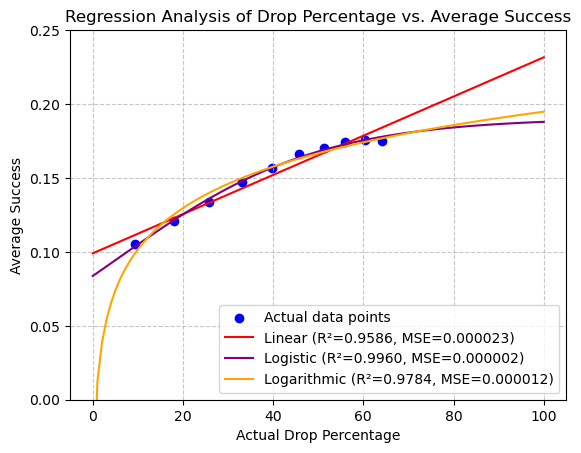

In [108]:
# Create a range of x values for prediction
x_range = np.linspace(0, 100, 100).reshape(-1, 1)
y_pred_linear_range = linear_model.predict(x_range)
y_pred_poly_range = poly_model.predict(poly_features.transform(x_range))

# Plot the actual data points
plt.ylim(0, 0.25)
plt.scatter(X, y, color='blue', label='Actual data points')

# Plot the regression lines
plt.plot(x_range, y_pred_linear_range, color='red', 
         label=f'Linear (R²={r2_linear:.4f}, MSE={mse_linear:.6f})')

# Plot the logistic regression curve
plt.plot(x_range, y_pred_logistic_range, color='purple', 
         label=f'Logistic (R²={r2_logistic:.4f}, MSE={mse_logistic:.6f})')

# Plot the logarithmic regression curve
plt.plot(x_range, y_pred_log_range, color='orange', 
         label=f'Logarithmic (R²={r2_log:.4f}, MSE={mse_log:.6f})')

# Add labels and title
plt.xlabel('Actual Drop Percentage')
plt.ylabel('Average Success')
plt.title('Regression Analysis of Drop Percentage vs. Average Success')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

In [104]:
def predict_success(drop_percentage, model_type='linear'):
    """
    Predict Average Success for given drop percentage.
    
    Parameters:
    drop_percentage (float or list): The drop percentage(s) to predict for
    model_type (str): 'linear', 'logistic', or 'logarithmic'
    
    Returns:
    float or array: Predicted Average Success value(s)
    """
    # Convert to numpy array if it's a list
    if isinstance(drop_percentage, list):
        dp_array = np.array(drop_percentage)
    else:
        dp_array = np.array([drop_percentage])
    
    if model_type.lower() == 'linear':
        return linear_model.predict(dp_array.reshape(-1, 1))
    elif model_type.lower() == 'logistic':
        return logistic_function(dp_array, L_fit, k_fit, x0_fit)
    elif model_type.lower() == 'logarithmic':
        return logarithmic_function(dp_array, a_fit, b_fit)
    else:
        raise ValueError("Model type must be 'linear', 'logistic', or 'logarithmic'")

In [105]:
# Example usage of the prediction function
test_percentages = [20, 40, 60, 80]
print("\nPredictions for test percentages:")
print("Drop Percentage | Linear Prediction | Logistic Prediction | Logarithmic Prediction")
print("-" * 85)

for percentage in test_percentages:
    linear_pred = predict_success(percentage, 'linear')[0]
    logistic_pred = predict_success(percentage, 'logistic')[0]
    log_pred = predict_success(percentage, 'logarithmic')[0]
    print(f"{percentage:14} | {linear_pred:.6f} | {logistic_pred:.6f} | {log_pred:.6f}")


Predictions for test percentages:
Drop Percentage | Linear Prediction | Logistic Prediction | Logarithmic Prediction
-------------------------------------------------------------------------------------
            20 | 0.125552 | 0.125385 | 0.129645
            40 | 0.152063 | 0.157273 | 0.157680
            60 | 0.178575 | 0.175473 | 0.174105
            80 | 0.205086 | 0.184165 | 0.185766


In [106]:

# Show the plot
plt.tight_layout()
plt.savefig('regression_plot.png')  # Save the plot to a file
plt.show()

# Print the model equations
linear_slope = linear_model.coef_[0]
linear_intercept = linear_model.intercept_
print("\nLinear Regression Equation:")
print(f"Average Success = {linear_slope:.6f} × (Actual Drop Percentage) + {linear_intercept:.6f}")

print("\nLogistic Regression Equation:")
print(f"Average Success = {L_fit:.6f} / (1 + exp(-{k_fit:.6f} × (Actual Drop Percentage - {x0_fit:.6f})))")

print("\nLogarithmic Regression Equation:")
print(f"Average Success = {a_fit:.6f} + {b_fit:.6f} × log(Actual Drop Percentage + 0.1)")

<Figure size 640x480 with 0 Axes>


Linear Regression Equation:
Average Success = 0.001326 × (Actual Drop Percentage) + 0.099040

Logistic Regression Equation:
Average Success = 0.190669 / (1 + exp(-0.044846 × (Actual Drop Percentage - 5.446818)))

Logarithmic Regression Equation:
Average Success = 0.007838 + 0.040592 × log(Actual Drop Percentage + 0.1)
